# Parcial Montecarlo [Min-Max]

##### Luis Felipe Narvaez Gomez. E-mail: luis.narvaez@usantoto.edu.co. Cod: 2312660. Facultad de Ingenieria de Sistemas. USTA


a rojo -1
a verde 13

dy = 6 
dx = 6

El parcial es el siguiente:

In [2]:
from IPython.display import Image

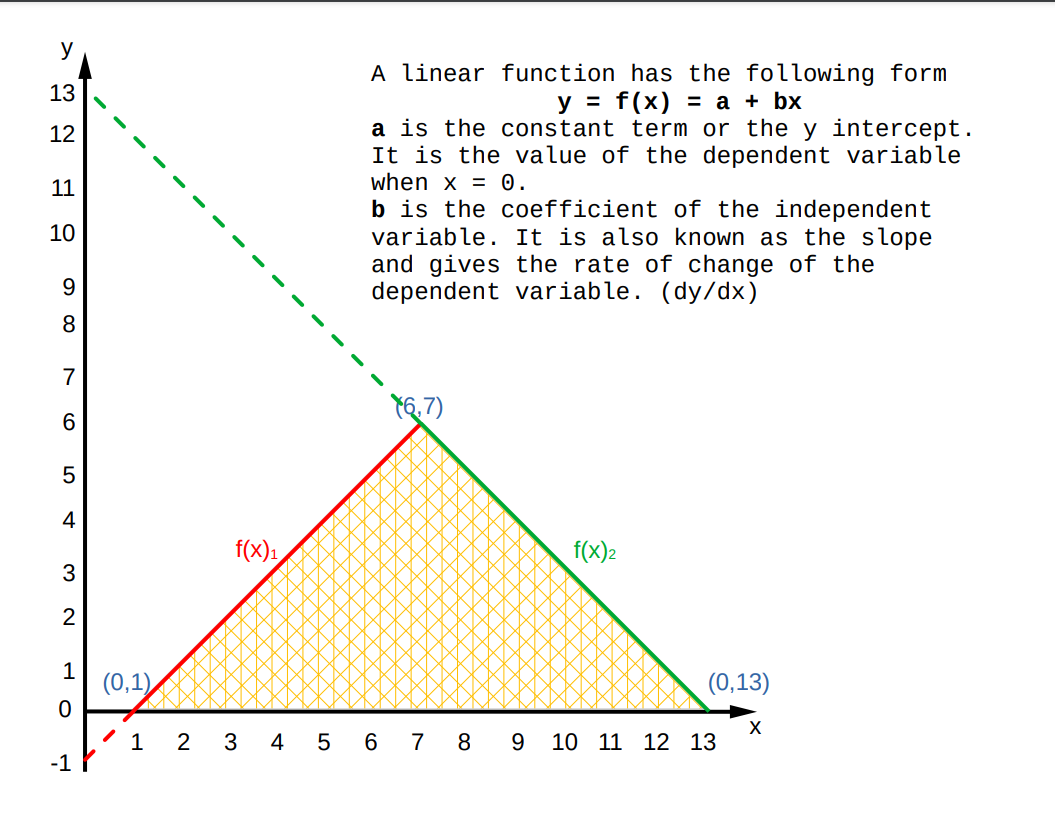

In [3]:
Image("partial.png")

In [4]:
# Primero librerias principales

import random
import numpy as np
import matplotlib.pyplot as plt

In [5]:
random.seed(2)

El problema nos plantea resolver al area de la figura observada, la misma esta compuesta por dos funciones:

$F(x)_1 = a + bx$
Donde:

1. a = -1
2. b = dy/dx = [0 - 6] / [1 - 7] = 6/6 = 1

Entonces:
$F(x)_1 = -1 + 1*x$

Podemos confirmalo con la siguiente herramienta:

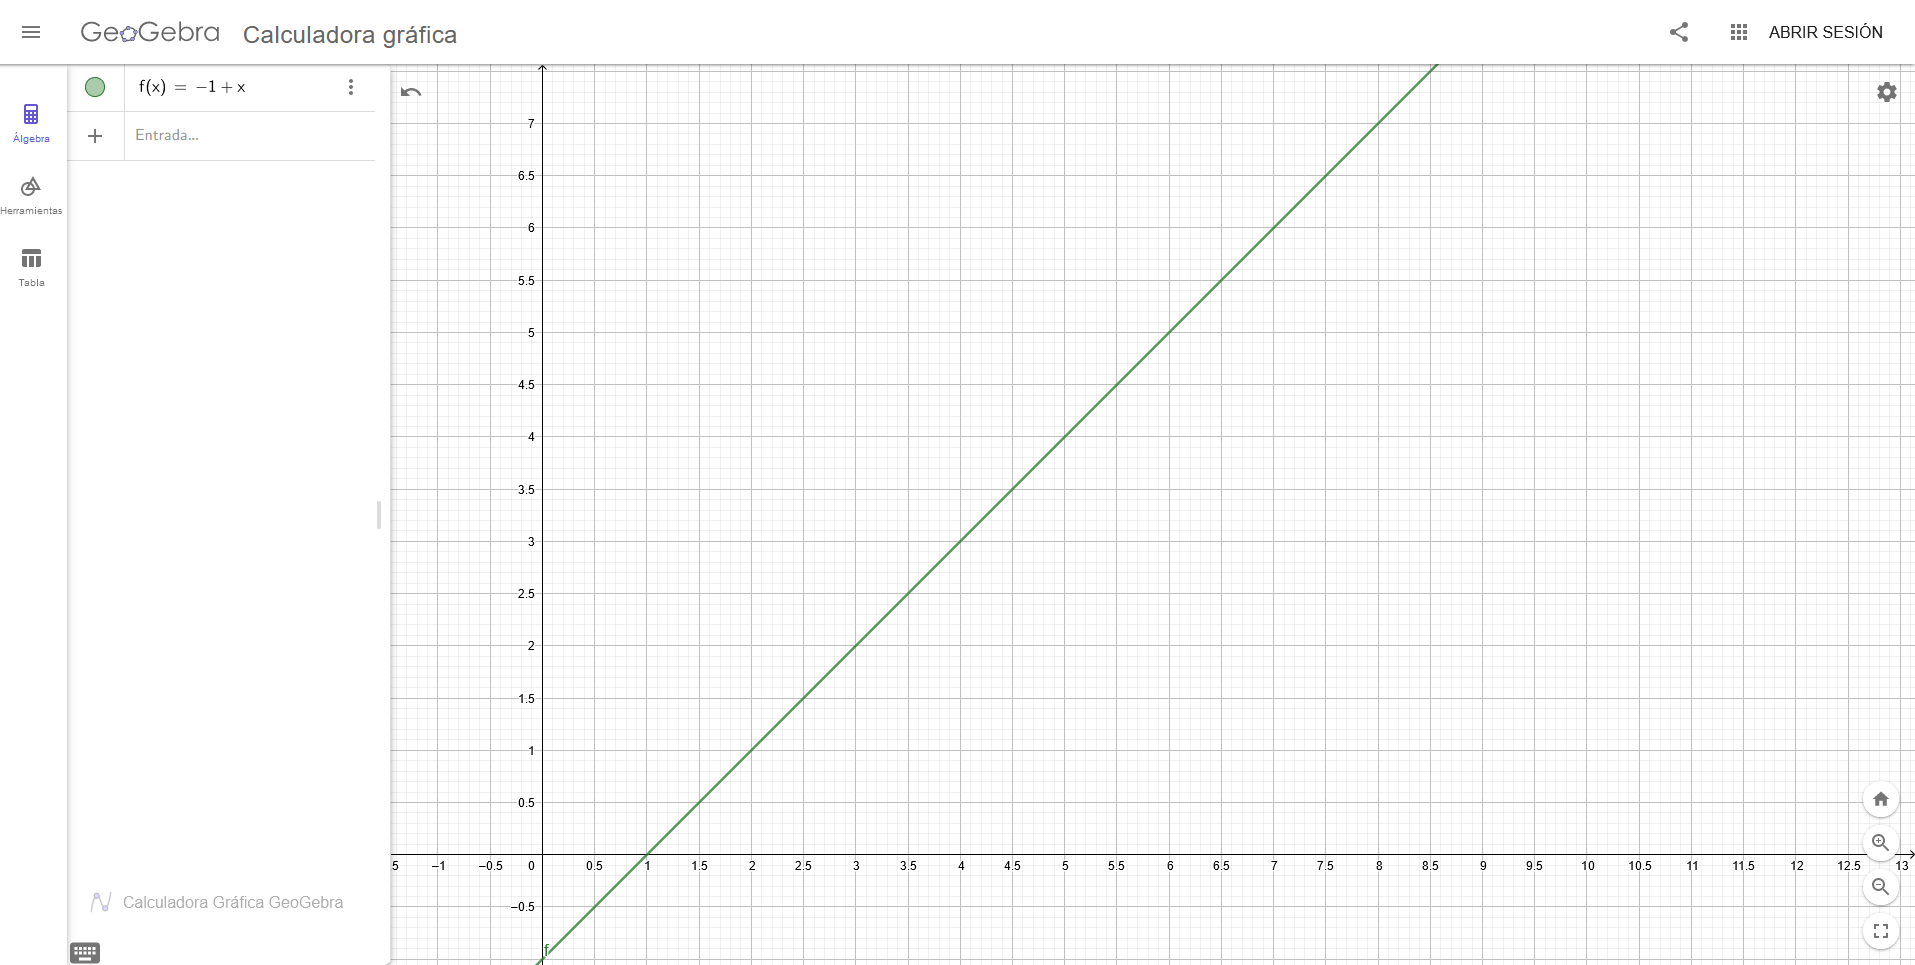

In [7]:
Image("geogebra1.png")

$F(x)_2 = a + bx$
Donde:

1. a = 13
2. b = dy/dx = [6 - 0] / [7 - 13] = -6/6 = -1

Entonces:

$F(x)_2 = 13 + -1*x$

Graficandolo seria:

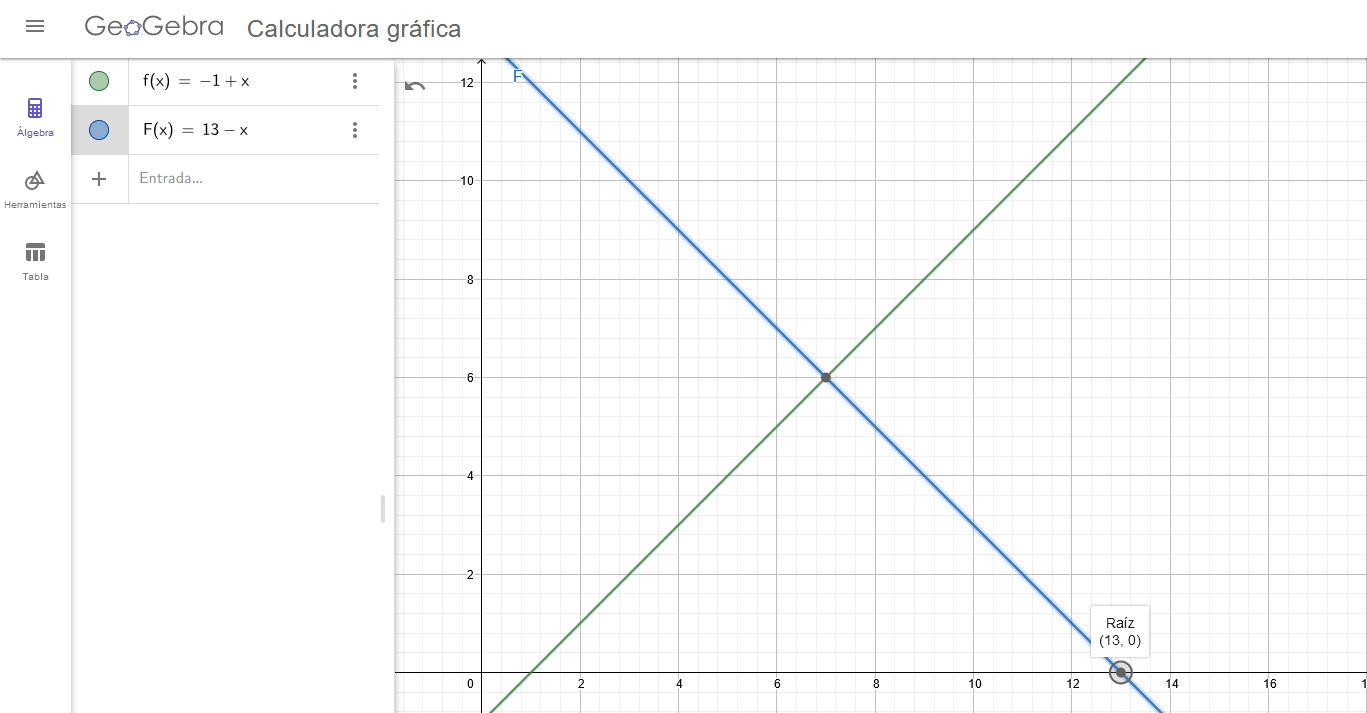

In [8]:
Image("geogebra2.png")

El metodo que utilizaremos es el siguiente para Montecarlo con Minimos y Maximos:

In [70]:
def MontecarloMinMax(function,init_X,finish_X, AxisOne, AxisTwo , ParaOne, ParaTwo):
    f = function
    a = init_X
    b = finish_X
    
    NumSteps = 1000000
    XIntegral = []
    YIntegral = []

    XRectangle = []
    YRectangle = []

    ymin = f(a)
    ymax = ymin

    for i in range(NumSteps):
      x = a + (b-a) * float(i)/NumSteps
      y = f(x)

      if y < ymin: ymin = y
      if y > ymax: ymax = y

    A = (b-a) * (ymax - ymin)
    N = 1000000
    M = 0

    for k in range(N):
      x = a + (b-a) * random.random()
      y = ymin + (ymax - ymin) * random.random()

      if y <= f(x):
        M += 1
        XIntegral.append(x)
        YIntegral.append(y)

      else:
        XRectangle.append(x)
        YRectangle.append(y)

    NumericalIntegral = M/N * A
    print('Numerical integration = ' + str(NumericalIntegral))

    Xlin = np.linspace(a,b)
    Ylin = []

    for x in Xlin:
      Ylin.append(f(x))

    plt.axis([AxisOne,ParaOne,AxisTwo,ParaTwo])

    plt.plot(Xlin, Ylin, color='red', linewidth='4')
    plt.scatter(XIntegral, YIntegral, color='yellow', marker='.')
    plt.scatter(XRectangle, YRectangle, color='cyan', marker='.')

    plt.title('Numerical Integration using Monte Carlo method')
    plt.show()
    
    return NumericalIntegral

Vamos con la primera area tendriamos los siguientes valores:

Numerical integration = 18.015965984016


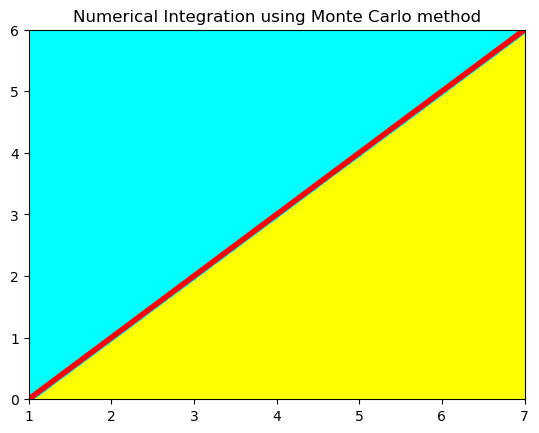

In [72]:
# [xmin, xmax, ymin, ymax]
# [AxisOne,ParaOne,AxisTwo,ParaTwo]
function= lambda x: -1 + x
init_X = 1
finish_X = 7
AxisOne = 1
AxisTwo = 0
ParaOne = b
ParaTwo = f(b)
FirstArea = MontecarloMinMax(function,init_X,finish_X, AxisOne, AxisTwo, ParaOne, ParaTwo)

Ahora vamos con la segunda funcion:

Numerical integration = 18.022697977284004


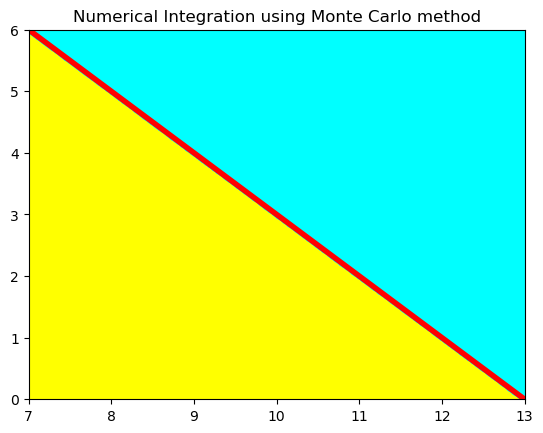

In [80]:
# [xmin, xmax, ymin, ymax]
# [AxisOne,ParaOne,AxisTwo,ParaTwo]
function= lambda x: 13 - x
init_X = 7
finish_X = 13
AxisOne = init_X
AxisTwo = 0
ParaOne = finish_X
ParaTwo = 6
SecondArea = MontecarloMinMax(function,init_X,finish_X, AxisOne, AxisTwo, ParaOne, ParaTwo)

In [81]:
print("La primera area tiene un valor de: " , str(FirstArea))
print("La segunda area tiene un vaor de: ", str(SecondArea))

La primera area tiene un valor de:  18.015965984016
La segunda area tiene un vaor de:  18.022697977284004


In [83]:
Total = FirstArea + SecondArea

In [84]:
print("El total del area bajo la curva es igual a: ", Total)

El total del area bajo la curva es igual a:  36.0386639613
